In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
ny=100
nx=480
eps_solid=0.01  

shape: (480, 100) 


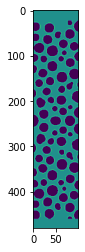

In [15]:
data=np.loadtxt("./MultiElement.txt").T
print(f"shape: {data.shape} ")
fig, ax = plt.subplots()
ax.imshow(data)

## Compose the eps

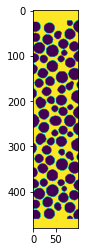

In [28]:
eps=np.ones([nx,ny])
for i in np.arange(0,nx):
    for j in np.arange(0,ny):
        if data[i,j]==0 or data[i,j]==2:
            eps[i,j]=eps_solid
fig, ax = plt.subplots()
ax.imshow(eps)

In [29]:
eps_internal_field=list()
eps_internal_field.append(f"{str(nx*ny)}\n")
eps_internal_field.append("(\n")
for j in np.arange(0,ny):
    for i in np.arange(0,nx):
        eps_internal_field.append(f"{str(eps[i,j])}\n")
eps_internal_field.append(")\n")
eps_internal_field.append(";\n")


In [30]:
with open("./eps_template","r") as fp:
    eps_template=fp.readlines()
internal_field_line_index=0
for index,line in enumerate(eps_template):
    if line.startswith("internalField"):
        internal_field_line_index=index
        for i in range(len(eps_internal_field)):
            eps_template.insert(internal_field_line_index+1+i,eps_internal_field[i])
        break

with open("./0/eps","w") as fp:
    fp.writelines(eps_template)

## Compose the coke

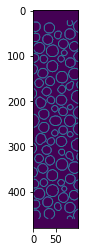

In [22]:
coke=np.zeros([nx,ny])
for i in np.arange(0,nx):
    for j in np.arange(0,ny):
        if data[i,j]==2:
            coke[i,j]=1-eps_solid
fig, ax = plt.subplots()
ax.imshow(coke)

In [23]:
coke_internal_field=list()
coke_internal_field.append(f"{str(nx*ny)}\n")
coke_internal_field.append("(\n")
for j in np.arange(0,ny):
    for i in np.arange(0,nx):
        coke_internal_field.append(f"{str(coke[i,j])}\n")
coke_internal_field.append(")\n")
coke_internal_field.append(";\n")


In [26]:
with open("./coke_template","r") as fp:
    coke_template=fp.readlines()
internal_field_line_index=0
for index,line in enumerate(coke_template):
    if line.startswith("internalField"):
        internal_field_line_index=index
        for i in range(len(coke_internal_field)):
            coke_template.insert(internal_field_line_index+1+i,coke_internal_field[i])
        break

with open("./0/coke","w") as fp:
    fp.writelines(coke_template)